# MATH4995 Capstone Project - Project 1

##### WONG Wing Kin 20504727 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

##### Read CSV

In [34]:
data = pd.read_csv("train.csv")

result = pd.read_csv("test.csv")

# Drop the columns that are not useful
#data.drop('PassengerId', axis = 1, inplace = True)
data.drop('Name', axis = 1, inplace = True)

#result.drop('PassengerId', axis = 1, inplace = True)
result.drop('Name', axis = 1, inplace = True)


##### Check the Missing Value

In [35]:
data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are lots of missing value in Cabin. I don't think it is useful for prediction. So I drop it.

In [36]:
data.drop('Cabin', axis = 1, inplace = True)
result.drop('Cabin', axis = 1, inplace = True)


Also, There are 681 different Ticket which may not be useful for prediction. 

In [37]:
data.drop('Ticket', axis = 1, inplace = True)
result.drop('Ticket', axis = 1, inplace = True)


In [38]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


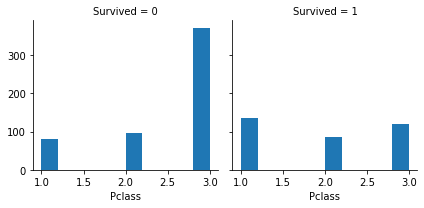

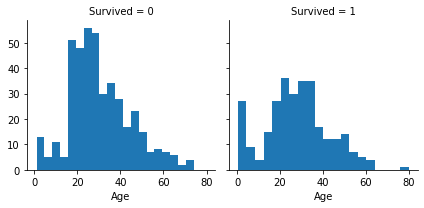

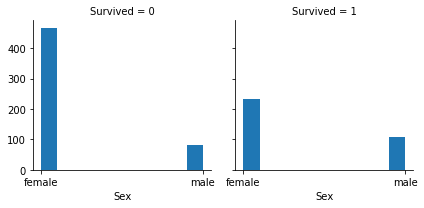

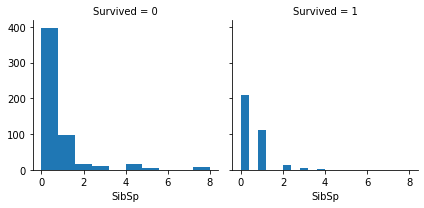

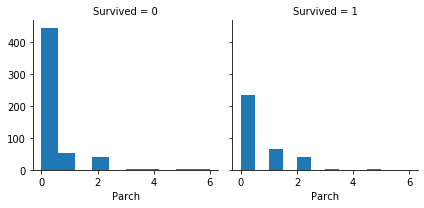

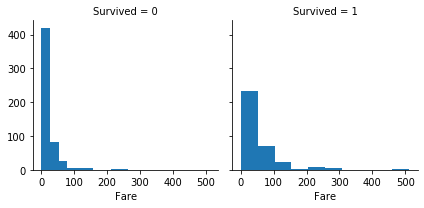

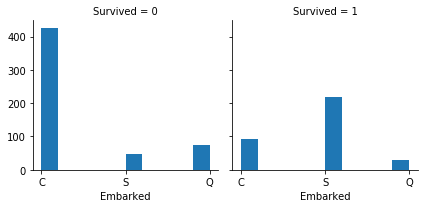

In [40]:
sns.FacetGrid(data, col='Survived').map(plt.hist, 'Pclass')
sns.FacetGrid(data, col='Survived').map(plt.hist, 'Age', bins=20)
sns.FacetGrid(data, col='Survived').map(plt.hist, 'Sex')
sns.FacetGrid(data, col='Survived').map(plt.hist, 'SibSp')
sns.FacetGrid(data, col='Survived').map(plt.hist, 'Parch')
sns.FacetGrid(data, col='Survived').map(plt.hist, 'Fare')
sns.FacetGrid(data, col='Survived').map(plt.hist, 'Embarked')


### Multiple Linear Regressions

In [41]:
est = smf.ols('Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked', data).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     58.84
Date:                Sun, 04 Oct 2020   Prob (F-statistic):           2.73e-73
Time:                        21:16:44   Log-Likelihood:                -321.06
No. Observations:                 712   AIC:                             660.1
Df Residuals:                     703   BIC:                             701.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.4031      0.082     17.214      0.000       1.243       1.563
Sex[T.male]      -0.4854      0.032    -15.389      0.000      -0.547      -0.423
Embarked[T.Q]    -0.0987      0.082     -1.198      0.231      -0.260       0.063
Embarked[T.S]    -0.0664      0.040     -1.674      0.095      -0.144       0.011
Pclass           -0.1874      0.023     -8.183      0.000      -0.232      -0.142
Age              -0.0064      0.001     -5.661      0.000      -0.009      -0.004
SibSp            -0.0508      0.017     -2.912      0.004      -0.085      -0.017
Parch            -0.0107      0.019     -0.561      0.575      -0.048       0.027
Fare              0.0002      0.000      0.565      0.572      -0.000       0.001
==============================================================================
Omnibus:                       25.698   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.819
Skew:                           0.484   Prob(JB):                     9.10e-07
Kurtosis:                       3.019   Cond. No.                         406.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
est = smf.ols('Survived ~  Sex  + SibSp ', data).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     194.7
Date:                Sun, 04 Oct 2020   Prob (F-statistic):           7.47e-71
Time:                        21:16:44   Log-Likelihood:                -459.94
No. Observations:                 891   AIC:                             925.9
Df Residuals:                     888   BIC:                             940.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.7723      0.024     31.536      0.000       0.724       0.820
Sex[T.male]    -0.5647      0.029    -19.695      0.000      -0.621      -0.508
SibSp          -0.0436      0.012     -3.512      0.000      -0.068      -0.019
==============================================================================
Omnibus:                       28.607   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.849
Skew:                           0.456   Prob(JB):                     2.00e-07
Kurtosis:                       2.984   Cond. No.                         3.80
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Perceptron

In [43]:
from sklearn.model_selection import train_test_split
# import the Perceptron library from sklearn and train the perceptron
from sklearn.linear_model import Perceptron
# import the accuracy_score from sklearn
from sklearn.metrics import accuracy_score

##### Let's Convert the Cat. Data into Numerical first and drop the NA value.
##### Also, the columns Embarked need to reshape long to wide

In [44]:
p_data = data

p_data = p_data.fillna(0)

p_data.set_index('PassengerId' , inplace = True)

temp = p_data.pivot(columns='Embarked', values='Embarked')

p_data = pd.concat([p_data, temp], axis=1)

p_data['C'] = p_data['C'].astype('category').cat.codes
p_data['Q'] = p_data['Q'].astype('category').cat.codes
p_data['S'] = p_data['S'].astype('category').cat.codes

p_data['C'] = p_data['C'].astype('category').cat.codes
p_data['Q'] = p_data['Q'].astype('category').cat.codes
p_data['S'] = p_data['S'].astype('category').cat.codes

p_data['Sex'] = p_data['Sex'].astype('category').cat.codes
p_data.drop('Embarked', axis = 1, inplace = True)

p_data = p_data.fillna(0)

print(p_data)

# Do the same thing in test data
p_result = result

p_result = p_result.fillna(0)
p_result.set_index('PassengerId' , inplace = True)

temp = p_result.pivot( columns='Embarked', values='Embarked')

p_result = pd.concat([p_result, temp], axis=1 )


p_result['C'] = p_result['C'].astype('category').cat.codes
p_result['Q'] = p_result['Q'].astype('category').cat.codes
p_result['S'] = p_result['S'].astype('category').cat.codes

p_result['C'] = p_result['C'].astype('category').cat.codes
p_result['Q'] = p_result['Q'].astype('category').cat.codes
p_result['S'] = p_result['S'].astype('category').cat.codes

p_result['Sex'] = p_result['Sex'].astype('category').cat.codes
p_result.drop('Embarked', axis = 1, inplace = True)

p_result = p_result.fillna(0)
print(p_result)


             Survived  Pclass  Sex   Age  SibSp  Parch     Fare  0  C  Q  S
PassengerId                                                                
1                   0       3    1  22.0      1      0   7.2500  0  0  0  1
2                   1       1    0  38.0      1      0  71.2833  0  1  0  0
3                   1       3    0  26.0      0      0   7.9250  0  0  0  1
4                   1       1    0  35.0      1      0  53.1000  0  0  0  1
5                   0       3    1  35.0      0      0   8.0500  0  0  0  1
...               ...     ...  ...   ...    ...    ...      ... .. .. .. ..
887                 0       2    1  27.0      0      0  13.0000  0  0  0  1
888                 1       1    0  19.0      0      0  30.0000  0  0  0  1
889                 0       3    0   0.0      1      2  23.4500  0  0  0  1
890                 1       1    1  26.0      0      0  30.0000  0  1  0  0
891                 0       3    1  32.0      0      0   7.7500  0  0  1  0

[891 rows x

##### Let's fit all the columns into single perceptron

In [45]:
X_train, X_test, y_train, y_test = train_test_split(p_data.loc[:, p_data.columns != "Survived" ], p_data[["Survived"]], test_size=0.2, random_state=3)

clf = Perceptron(fit_intercept=True, eta0=0.3) # eta0 is the learning rate
clf.fit(X_train, y_train)


y_pred_train = clf.predict(X_train)
print("Train Accuracy: ", accuracy_score(y_train, y_pred_train))

y_pred_test = clf.predict(X_test)
print("Valid Accuracy: ", accuracy_score(y_test, y_pred_test))

Train Accuracy:  0.7078651685393258
Valid Accuracy:  0.6815642458100558


C:\Users\kin09\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy is around 68.15%

##### Let's select some variable and fit some them into single perceptron

In [46]:
X_train, X_test, y_train, y_test = train_test_split(p_data[['Pclass', 'Sex'  ]], p_data[["Survived"]], test_size=0.2, random_state=3)

z_train = p_result[['Pclass', 'Sex' ]]

# Define and train the perceptron
clf = Perceptron(fit_intercept=True, eta0=0.3) # eta0 is the learning rate
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
print("Train Accuracy: ", accuracy_score(y_train, y_pred_train))

y_pred_test = clf.predict(X_test)
print("Valid Accuracy: ", accuracy_score(y_test, y_pred_test))

Train Accuracy:  0.7584269662921348
Valid Accuracy:  0.7206703910614525


C:\Users\kin09\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(p_data[['Pclass', 'Sex' , 'C' , 'Q' , 'S' ]], p_data[["Survived"]], test_size=0.2, random_state=3)

z_train = p_result[['Pclass', 'Sex' ]]

# Define and train the perceptron
clf = Perceptron(fit_intercept=True, eta0=0.3) # eta0 is the learning rate
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
print("Train Accuracy: ", accuracy_score(y_train, y_pred_train))

y_pred_test = clf.predict(X_test)
print("Valid Accuracy: ", accuracy_score(y_test, y_pred_test))

C:\Users\kin09\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Accuracy:  0.7626404494382022
Valid Accuracy:  0.7541899441340782


In [48]:
X_train, X_test, y_train, y_test = train_test_split(p_data[['Pclass', 'Sex' , 'C'  ]], p_data[["Survived"]], test_size=0.2, random_state=3)

z_train = p_result[['Pclass', 'Sex' ]]

# Define and train the perceptron
clf = Perceptron(fit_intercept=True, eta0=0.3) # eta0 is the learning rate
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
print("Train Accuracy: ", accuracy_score(y_train, y_pred_train))

y_pred_test = clf.predict(X_test)
print("Valid Accuracy: ", accuracy_score(y_test, y_pred_test))

Train Accuracy:  0.7837078651685393
Valid Accuracy:  0.7541899441340782


C:\Users\kin09\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
X_train, X_test, y_train, y_test = train_test_split(p_data[['Pclass', 'Sex' , 'C' , 'S' ]], p_data[["Survived"]], test_size=0.2, random_state=3)

z_train = p_result[['Pclass', 'Sex' ]]

# Define and train the perceptron
clf = Perceptron(fit_intercept=True, eta0=0.3) # eta0 is the learning rate
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
print("Train Accuracy: ", accuracy_score(y_train, y_pred_train))

y_pred_test = clf.predict(X_test)
print("Valid Accuracy: ", accuracy_score(y_test, y_pred_test))

Train Accuracy:  0.723314606741573
Valid Accuracy:  0.6815642458100558


C:\Users\kin09\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(p_data[['Pclass', 'Parch', 'Sex' , 'C' ,  'Q' , 'S'  ]], p_data[["Survived"]], test_size=0.2, random_state=3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Define and train the perceptron
clf = Perceptron(fit_intercept=True, eta0=0.3) # eta0 is the learning rate
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
print("Train Accuracy: ", accuracy_score(y_train, y_pred_train))

y_pred_test = clf.predict(X_test)
print("Valid Accuracy: ", accuracy_score(y_test, y_pred_test))

C:\Users\kin09\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Accuracy:  0.7837078651685393
Valid Accuracy:  0.7541899441340782


In [58]:
X_train, X_test, y_train, y_test = train_test_split(p_data[['Age',  'Sex' ]], p_data[["Survived"]], test_size=0.2, random_state=3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Define and train the perceptron
clf = Perceptron(fit_intercept=True, eta0=0.3) # eta0 is the learning rate
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
print("Train Accuracy: ", accuracy_score(y_train, y_pred_train))

y_pred_test = clf.predict(X_test)
print("Valid Accuracy: ", accuracy_score(y_test, y_pred_test))

Train Accuracy:  0.7865168539325843
Valid Accuracy:  0.7877094972067039


C:\Users\kin09\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
X_train, X_test, y_train, y_test = train_test_split(p_data[['Age',  'Sex' , 'Fare' , 'Parch' ]], p_data[["Survived"]], test_size=0.2, random_state=3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Define and train the perceptron
clf = Perceptron(fit_intercept=True, eta0=0.3) # eta0 is the learning rate
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
print("Train Accuracy: ", accuracy_score(y_train, y_pred_train))

y_pred_test = clf.predict(X_test)
print("Valid Accuracy: ", accuracy_score(y_test, y_pred_test))

Train Accuracy:  0.6390449438202247
Valid Accuracy:  0.6312849162011173


C:\Users\kin09\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
